In [1]:
!nvidia-smi

Thu Oct  7 14:36:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install top2vec
!pip install umap-learn[plot]

In [5]:
import json
import requests

import umap
import umap.plot
import hdbscan

from top2vec import Top2Vec

In [6]:
url = 'http://tools.kinds.or.kr:8888/search/news'

datas = {
    "access_key": "9af2f705-2974-4340-8b55-d69040b944ab",

    "argument": {
        "query": {"title":""},
        "published_at": {
            "from": "2021-08-29",
            "until": "2021-10-06"
            },
            "provider": [],
            "category": ["008004000"],
            "category_incident": [""],
            "byline": "",
            "provider_subject": [""],
            "subject_info": [""],
            "subject_info1": [""],
            "subject_info2": [""],
            "subject_info3": [""],
            "subject_info4": [""],
            "sort": {"date": "asc"},
            "hilight": 200,
            "return_from": 0,
            "return_size": 100000,
            "fields": [
                "byline",
                "category",
                "category_incident",
                "provider_news_id",
                "hilight",
                ]
                }
         }

response = requests.post(url, data=json.dumps(datas))
js=response.json()

js

{'result': 0,
 'return_object': {'documents': [{'byline': '이수영',
    'category': ['경제>유통', 'IT_과학>인터넷_SNS', 'IT_과학>콘텐츠'],
    'category_incident': [],
    'dateline': '2021-08-29T00:25:31.000+09:00',
    'enveloped_at': '2021-08-29T00:16:12.000+09:00',
    'hilight': "산지폐기 위기 딛고 ..'완판 행진'… 온라인마켓, 농산물 유통 새 대안 되나 애호박 가격 폭락으로 화천산 애호박의 산지폐기 소식이 알려졌던 지난달 말,기적 같은 일이 벌어졌다... .. .. ..안타까운 소식에 전국의 소비자들의 주문이 쇄도한 것이다.지난달 25일부터 26일 오전까지 하루 사이에 최소 112t의 애호박 주문이 접수됐다.이는 8㎏ 기준 ..",
    'news_id': '01300101.20210828001612001',
    'provider': '강원도민일보',
    'provider_news_id': '1088846',
    'published_at': '2021-08-29T00:00:00.000+09:00',
    'title': "산지폐기 위기 딛고 '완판 행진'… 온라인마켓, 농산물 유통 새 대안 되나"},
   {'byline': '김경은',
    'category': ['경제>유통', 'IT_과학>콘텐츠', '경제>자동차'],
    'category_incident': [],
    'dateline': '2021-08-29T06:02:00.000+09:00',
    'enveloped_at': '2021-08-29T06:03:02.000+09:00',
    'hilight': '[주간 가구 스토리] 새 매장 열고 새 브랜드 론칭… 업계 ..‘공격 행보’ ..‘나’를 꾸민다는 개념은 얼굴과 몸, 패션을 넘어 실내 인테리어까지 확장하고 있습니다

In [7]:
total_hits = js['return_object']['total_hits']
print("결과 개수:",total_hits)

결과 개수: 9650


In [8]:
#total_hits = 10000
# 모든 타이틀
titles, hilights ,ths= [], [], []
for i in range(total_hits):
    title = js['return_object']['documents'][i]['title']
    hilight = js['return_object']['documents'][i]['hilight']
    th = title +","+ hilight

    #titles.append(title)
    #hilights.append(hilight)
    ths.append(th)
len(ths)

9650

In [9]:
model = 0

In [10]:
model = Top2Vec(documents = ths, speed="learn")

2021-10-07 14:38:36,977 - top2vec - INFO - Pre-processing documents for training
2021-10-07 14:38:38,687 - top2vec - INFO - Creating joint document/word embedding
2021-10-07 14:39:14,015 - top2vec - INFO - Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2021-10-07 14:39:46,453 - top2vec - INFO - Finding dense areas of documents
2021-10-07 14:39:46,892 - top2vec - INFO - Finding topics


In [11]:
# https://github.com/ddangelov/Top2Vec/blob/master/top2vec/Top2Vec.py
# line 360
model._get_document_vectors()

array([[ 1.5636986e-02,  3.6169477e-02, -3.0476818e-02, ...,
         1.8458558e-02,  6.3887574e-02, -2.2360650e-03],
       [-3.0013511e-02,  3.8756590e-02,  6.5385908e-02, ...,
        -5.2648310e-02,  7.2553806e-02,  4.5609679e-02],
       [-7.8034721e-02,  5.9157945e-02,  6.6767707e-02, ...,
         2.0425063e-02,  6.7523666e-02,  1.3697322e-01],
       ...,
       [ 1.5115814e-02, -1.7973349e-05, -4.9875498e-02, ...,
         1.2794336e-02,  6.2807970e-02, -2.6868923e-02],
       [-6.8590246e-02, -3.0508570e-02, -1.4637732e-02, ...,
         3.8576849e-02, -7.8868747e-02, -4.4233460e-02],
       [-8.5198786e-03,  1.0317846e-02, -4.7115501e-02, ...,
        -5.5482674e-02, -2.2537136e-02, -7.0034601e-02]], dtype=float32)

In [12]:
umap_args = {'n_neighbors': 15,
             'n_components': 2,
             'metric': 'cosine'}

mapper = umap.UMAP(**umap_args).fit(model._get_document_vectors(norm=False))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


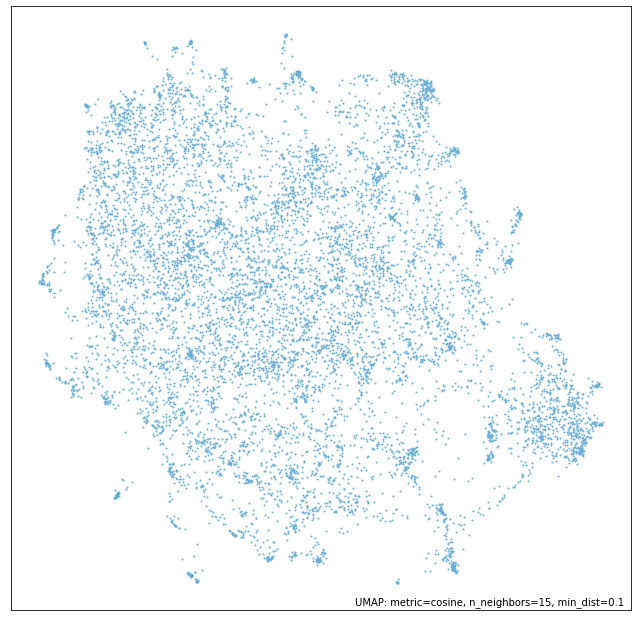

In [13]:
# https://umap-learn.readthedocs.io/en/latest/clustering.html
umap.plot.points(mapper,) 
# color_key {-1:'#000000',0:'#'}

In [14]:
hdbscan_args = {'min_cluster_size': 15,
                'metric': 'euclidean',
                'cluster_selection_method': 'eom'}

cluster = hdbscan.HDBSCAN(**hdbscan_args).fit(mapper.embedding_)

In [15]:
cluster.labels_

array([-1, 46, -1, ..., 96, 93, -1])

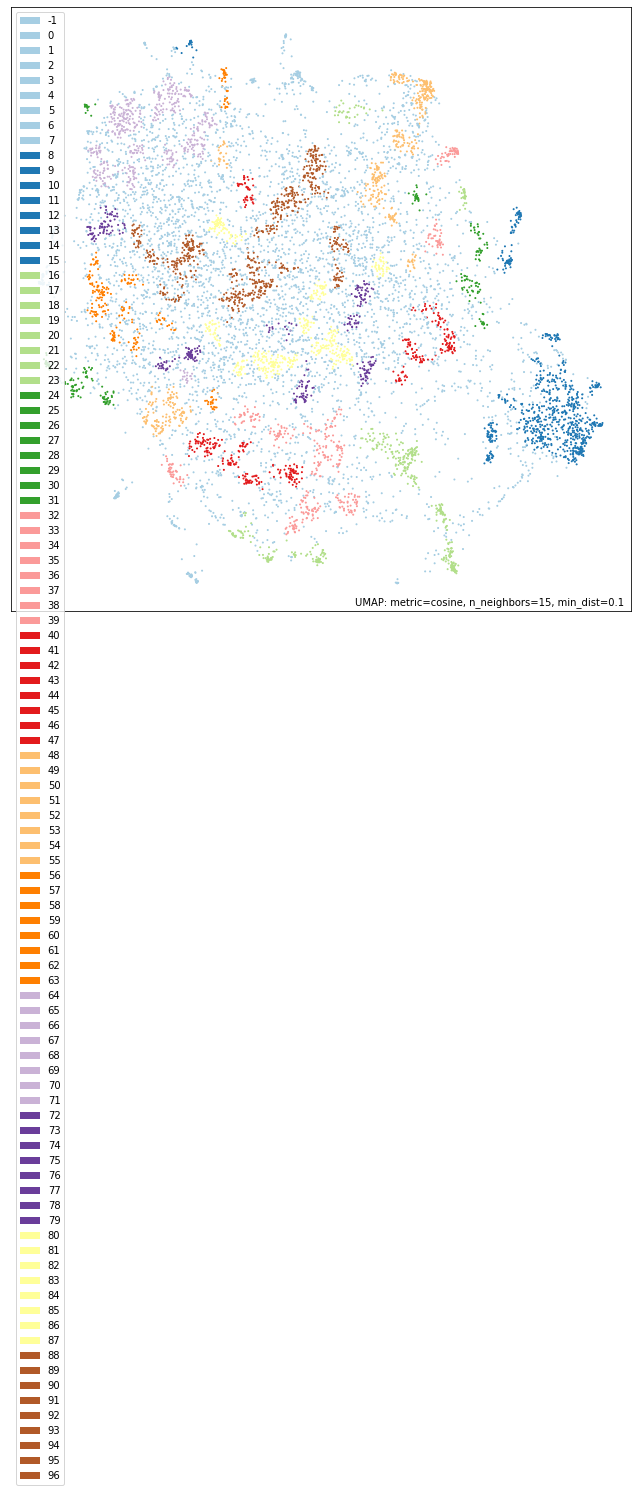

In [16]:
# https://github.com/ddangelov/Top2Vec/blob/master/top2vec/Top2Vec.py
# line 376
#
# https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html
umap.plot.points(mapper,cluster.labels_, color_key_cmap='Paired',show_legend=True)

In [17]:
model.get_num_topics()

84

In [18]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [19]:
topic_sizes

array([534, 371, 349, 231, 230, 216, 195, 191, 191, 186, 185, 169, 156,
       152, 151, 149, 147, 147, 142, 139, 137, 137, 135, 131, 125, 122,
       120, 120, 118, 118, 117, 114, 113, 113, 111, 109, 109, 105, 104,
       102, 101, 100,  99,  98,  97,  93,  92,  86,  85,  84,  83,  82,
        81,  81,  80,  77,  77,  77,  76,  75,  73,  72,  69,  69,  65,
        63,  62,  61,  59,  59,  58,  57,  54,  54,  54,  54,  50,  49,
        48,  46,  44,  43,  42,  30])

In [20]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=['넷플릭스'], num_topics=5)

In [21]:
topic_nums

array([ 0, 46, 32, 48, 82])

In [22]:
topic_scores

array([0.84552431, 0.76777319, 0.643059  , 0.39980529, 0.39632764])

In [40]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=0, num_docs=10)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()


Document: 6495, Score: 0.9244875311851501
-----------
글로벌 열풍…'오징어게임' 전세계 넷플릭스 드라마 1위,글로벌 열풍…'오징어게임' 전세계 넷플릭스 드라마 1위 국내외에서 엄청난 인기를 끌고 있는 넷플릭스 오리지널 시리즈 ..‘오징어 게임’이 한국 드라마 최초로 전 세계 넷플릭스 1위를 올랐다... .. .. .. ..24일(현지 시간) 플릭스패트롤에 따르면 지난 17일 공개된 넷플릭스 오리지널 시리즈 오징어 게임은 전체 순위 1위를 차지했다... 2위는 ..
-----------

Document: 7984, Score: 0.9194933176040649
-----------
'오징어 게임' 유럽도 매혹, 이탈리아 넷플릭스 첫 1위,'오징어 게임' 유럽도 매혹, 이탈리아 넷플릭스 첫 1위 ..[아시아경제 이창환 기자] 넷플릭스 오리지널 드라마 ..'오징어 게임'이 유럽에서 크게 인기를 끌고 있다... .. .. .. ..업계에 따르면 오징어 게임은 29일(현지시간) 기준 이탈리아 넷플릭스에서 1위에 랭크됐다... 지난 17일 출시된 이후 한동안 2위를 지키다 전날 영국 드라마 ..
-----------

Document: 8939, Score: 0.9167622923851013
-----------
‘오징어 게임’ 발리우드 뚫고 넷플릭스 세계 제패…제프 베조스 “인상적”,‘오징어 게임’ 발리우드 뚫고 넷플릭스 세계 제패…제프 베조스 ..“인상적” 넷플릭스 오리지널 시리즈 ..‘오징어 게임’이 넷플릭스가 서비스 중인 83개국에서 모두 TV쇼 스트리밍 1위를 차지했다... .. .. .. ..특히 자국 영화·드라마 산업이 강세인 인도 시장에서도 1위를 차지해 눈길을 끈다... 인도는 ..‘발리우드’로 불리는 독자적인 시장이..
-----------

Document: 8854, Score: 0.9073317050933838
-----------
오징어게임, 6일 美지미팰런쇼 출격…넷플릭스 “출연진은 비밀”,오징어게임

In [24]:
topic_words, word_scores, topic_nums = model.get_topics()

In [25]:
topic_words[0]

array(['돌풍을', '세계적인', '집계', '넷플릭스에서', '황동혁', '넷플릭스의', '드라마', '공개된', '위에',
       '차지했다', '시리즈', '오징어', '감독', '넷플릭스', '일으키고', '달고나', '순위', '올랐다',
       '열풍', '기생충', '위를', '이정재', '오징어게임', '인기에', '전세계', '오리지널', '배우',
       '등장한', '넷플릭스가', '게임이', '인기를', '게임', '한국', '끌고', '정호연', '얻고', '작품',
       '현지시간', '현지', '오늘의', '세계적으로', '사이트', '게임은', '게임에', '뜨거운', '등장',
       '인기', '개국', '돌풍', '넷플릭스는'], dtype='<U9')

In [28]:
url = 'http://tools.kinds.or.kr:8888/feature'

datas = {
    "access_key": "9af2f705-2974-4340-8b55-d69040b944ab",
    "argument": {
        "title": '''
        '이정재 측 "넷플릭스 \'오징어게임\', 제안 받고 검토중"(공식입장)'
        ''', 
        "sub_title": "", 
        "content": f"{squid_content}" 
        }
}

response = requests.post(url, data=json.dumps(datas))
response.json()

{'result': 0,
 'return_object': {'result': {'content': '이정재|0.08825489164396068 넷플릭스|0.07826508761296858 오징어_게임|0.057054911027903873 아티스트컴퍼니|0.0495483078412826 소속사|0.048498675926925895 넷플릭스_오리지널|0.04695254089131794 소속사_아티스트컴퍼니|0.04502583091668381 시리즈_오징어|0.044697870063729536 측_넷플릭스_오징어게임|0.04253864354478296 소속사_아티스트컴퍼니_관계자|0.042362729822562846 사람들|0.04169268104907382 패배자|0.04051984122467682 관계자|0.038512637256750824 공식입장|0.038281328162907746 오징어게임|0.03793064650707744 검토중|0.03679140658226075 100억|0.02949058249150137 검토|7.786072356567795E-4 오징어|6.760653572735267E-4 게임|5.744592490465059E-4 제안|5.680076509015733E-4 출연|5.574800016936361E-4 공식|3.934845800176391E-4 인생|3.8924081159064073E-4 입장|3.820389740932617E-4 시리즈|3.8009307169440445E-4 오리지널|3.7950580858351805E-4 단계|3.6711195762544475E-4',
   'sub_title': '',
   'title': '넷플릭스|0.12306345345839738 이정재|0.10024158846826436 이정재_측_넷플릭스_오징어게임|0.09008127805142463 넷플릭스_오징어게임|0.08741432955941293 공식입장|0.08226376098846949 검토중|0.08158902381749446 공식|8.37

In [26]:
url = 'http://tools.kinds.or.kr:8888/search/news'

datas = {
    "access_key": "9af2f705-2974-4340-8b55-d69040b944ab",

    "argument": {
        "query": {"title":""},
        "published_at": {
            "from": "2019-11-13",
            "until": "2019-11-20"
            },
            "provider": [],
            "category": ["008004000"],
            "category_incident": [""],
            "byline": "",
            "provider_subject": [""],
            "subject_info": [""],
            "subject_info1": [""],
            "subject_info2": [""],
            "subject_info3": [""],
            "subject_info4": [""],
            "sort": {"date": "asc"},
            "hilight": 200,
            "return_from": 0,
            "return_size": 100000,
            "fields": [
                "byline",
                "category",
                "category_incident",
                "provider_news_id",
                "hilight",
                ]
                }
         }

response = requests.post(url, data=json.dumps(datas))
js=response.json()

js

{'result': 0,
 'return_object': {'documents': [{'byline': '김문희',
    'category': ['IT_과학>콘텐츠', 'IT_과학>과학', 'IT_과학>모바일'],
    'category_incident': ['사회>사회갈등>반란_혁명_폭동'],
    'dateline': '2019-11-12T17:30:35.000+09:00',
    'enveloped_at': '2019-11-12T17:30:35.000+09:00',
    'hilight': '연세대 정보대학원, 한국지능형사물인터넷협회와 MOU 연세대학교 정보대학원과 한국지능형사물인터넷협회가 지능형 사물인터넷 기반 서비스 융합산업 육성을 위한 업무협약을 체결했다... 왼쪽부터 박원근 한국지능형사물인터넷협회 부장, 문성계 부회장, 이준기 연세대 정보대학원 원장, 이정훈 정보대학원 IoT서비스융합트랙 담당교수... 연세대학교 제공 .. .. ..',
    'news_id': '02100501.20191113173035002',
    'provider': '파이낸셜뉴스',
    'provider_news_id': '201911121727264737',
    'published_at': '2019-11-13T00:00:00.000+09:00',
    'title': '연세대 정보대학원, 한국지능형사물인터넷협회와 MOU'},
   {'byline': '김아름',
    'category': ['IT_과학>모바일', 'IT_과학>콘텐츠', 'IT_과학>보안'],
    'category_incident': [],
    'dateline': '2019-11-12T17:57:57.000+09:00',
    'enveloped_at': '2019-11-12T17:57:57.000+09:00',
    'hilight': "뉴스 사용료 없애는 네이버… 언론사에 뉴스 광고수익 전액 주기로 내년 4월부터 수익 배분 모델 변경 .. ..'매체가 주인' 플랫폼

In [27]:
total_hits = js['return_object']['total_hits']
print("결과 개수:",total_hits)

결과 개수: 1853


In [28]:
#total_hits = 10000
# 모든 타이틀
titles, hilights ,ths= [], [], []
for i in range(total_hits):
    title = js['return_object']['documents'][i]['title']
    hilight = js['return_object']['documents'][i]['hilight']
    th = title +","+ hilight

    #titles.append(title)
    #hilights.append(hilight)
    ths.append(th)
len(ths)

1853

In [29]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import strip_tags

In [30]:
preprodocs=[]
for doc in ths:
    preprodocs.append(simple_preprocess(strip_tags(doc), deacc=True))

In [41]:
preprodocs[11]

['여야',
 '대장동',
 '고발사주',
 '피켓',
 '정면충돌',
 '국감',
 '곳곳서',
 '파행',
 '대장동',
 '게이트',
 '일파만파',
 '여야',
 '대장동',
 '고발사주',
 '피켓',
 '정면충돌',
 '국감',
 '곳곳서',
 '파행',
 '대장동',
 '게이트',
 '일파만파',
 '대장동',
 '몸통은',
 '이재명',
 '강공',
 '윤석열',
 '총장',
 '정치검찰',
 '맞불',
 '정쟁으로',
 '얼룩',
 '민생국감',
 '실종',
 '산업통상자원부를']

In [100]:
test = list(set(preprodocs[31]))
work=[]
for i in test:
    try:
        topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=[i], num_topics=5)
        work.append(i)
    except:
        None
print(work)
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=work, num_topics=5)

['등이', '일부터', '보고', '진행', '이번', '일까지']


In [101]:
topic_nums

array([25,  5, 72, 22,  6])

In [102]:
topic_scores

array([0.56585818, 0.5403838 , 0.53540899, 0.52131861, 0.51206503])

In [103]:
ths[31]

"광명시의회, 21일까지 임시회… 4회 추경예산안 심사 등 진행,광명시의회, 21일까지 임시회… 4회 추경예산안 심사 등 진행 광명시의회는 7일부터 21일까지 15일간 제264회 임시회를 개최한다... .. .. .. ..이번 임시회에서는 ..▲주요업무 추진상황 보고 ..▲조례안 심사 ..▲제4회 추가경정예산안심사 등이 진행된다... .. .. .. ..8일로 예정된 조례안 심사에서는 ..'GM-TOWER 도시재생사.."

In [109]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=24, num_docs=10)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()


Document: 3804, Score: 0.8965685367584229
-----------
"곽상도 아들 퇴직금이 범죄냐" 조수진 문자 깐 이준석,"곽상도 아들 퇴직금이 범죄냐" 조수진 문자 깐 이준석 이준석 국민의힘 대표는 1일 긴급 최고위원회 개최에 반발한 조수진 최고위원을 향해 .."전두환 신군부 소리 들어가면서 굳이 당무를 할 필요가 없다"며 불쾌함을 내비쳤다... .. .. .. .. 이 대표는 이날 오전 자신의 페이스북에 올린 글에서 .."'상도수호' 없다는 당 대표의 말이 나오기 무섭..
-----------

Document: 5511, Score: 0.8946973085403442
-----------
'상도수호' 조수진, 곽상도 사퇴하자 "이준석에 유감이다",'상도수호' 조수진, 곽상도 사퇴하자 .."이준석에 유감이다" ..[아시아경제 황수미 기자] 조수진 국민의힘 최고위원이 곽상도 무소속 의원이 사퇴를 발표하자 .."이준석 대표에게 유감을 표한다... 비 온 뒤에 땅은 더욱 단단해진다"고 말했다... .. .. .. ..조 위원은 2일 자신의 페이스북에 .."곽 의원의 신상처리 방식을 두고 의견의 차이로 ..
-----------

Document: 5409, Score: 0.8741359710693359
-----------
"조수진 '상도수호' 눈물겹다" 맹폭한 김남국 "내 눈에는 곽상도 같아","조수진 ..'상도수호' 눈물겹다" 맹폭한 김남국 .."내 눈에는 곽상도 같아" 곽상도 의원 제명 움직임에 반발하면서 이준석 국민의힘 대표와 정면충돌한 조수진 의원 논란 관련, 김남국 더불어민주당 의원이 ..''상도수호'가 눈물 겹다"고 조 의원을 향해 날카롭게 대립각을 세웠다... .. .. .. .. .. 김 의원은 1일 자신의 페이스북에 올린 글을..
-----------

Document: 4224, Score: 0.8720714449882507
-----------
‘상도수호’ 내분서 이준석 편든 洪 “조수진 과했다. 부적절”,‘상

In [107]:
topic_words, word_scores, topic_nums = model.get_topics()

In [108]:
topic_words[25]

array(['신세계', '예상', '방안', '아시아경제', '개월', '윤영찬', '가운데', '최대', '전망이다', '회장',
       '방안을', '보낸', '들어', '올해', '이를', '지난', '등이', '인사', '대비', '명이', '국내',
       '공급', '현재', '받았다', 'tv', '기간', '정권', '따른', '정부', '열리는', '준비', '기준',
       '설립', '못한', '강화', '넘어', '수도권', '동안', '변호사', '따라', '가장', '만명', '등을',
       '명을', '시간', '주요', '일까지', '향후', '지적이', '있는'], dtype='<U10')

In [26]:
url = 'http://tools.kinds.or.kr:8888/search/news'

datas = {
    "access_key": "9af2f705-2974-4340-8b55-d69040b944ab",

    "argument": {
        "query": {"title":"이정재"},
        "published_at": {
            "from": "2019-11-13",
            "until": "2019-11-20"  # 날짜 미만의 기사 수집
            },
            "provider": [],
            "category": ["008000000"],
            "category_incident": [""],
            "byline": "",
            "provider_subject": [""],
            "subject_info": [""],
            "subject_info1": [""],
            "subject_info2": [""],
            "subject_info3": [""],
            "subject_info4": [""],
            "sort": {"date": "asc"},
            "hilight": 200,
            "return_from": 0,
            "return_size": 100000,
            "fields": [
                "byline",
                "category",
                "category_incident",
                "provider_news_id",
                "hilight",
                ]
                }
         }

response = requests.post(url, data=json.dumps(datas))
js=response.json()

js
squid_content = js['return_object']['documents'][0]['hilight']

In [27]:
url = 'http://tools.kinds.or.kr:8888/feature'

datas = {
    "access_key": "9af2f705-2974-4340-8b55-d69040b944ab",
    "argument": {
        "title": '''
        '이정재 측 "넷플릭스 \'오징어게임\', 제안 받고 검토중"(공식입장)'
        ''', 
        "sub_title": "", 
        "content": f"{squid_content}" 
        }
}

response = requests.post(url, data=json.dumps(datas))
response.json()

{'result': 0,
 'return_object': {'result': {'content': '이정재|0.08825489164396068 넷플릭스|0.07826508761296858 오징어_게임|0.057054911027903873 아티스트컴퍼니|0.0495483078412826 소속사|0.048498675926925895 넷플릭스_오리지널|0.04695254089131794 소속사_아티스트컴퍼니|0.04502583091668381 시리즈_오징어|0.044697870063729536 측_넷플릭스_오징어게임|0.04253864354478296 소속사_아티스트컴퍼니_관계자|0.042362729822562846 사람들|0.04169268104907382 패배자|0.04051984122467682 관계자|0.038512637256750824 공식입장|0.038281328162907746 오징어게임|0.03793064650707744 검토중|0.03679140658226075 100억|0.02949058249150137 검토|7.786072356567795E-4 오징어|6.760653572735267E-4 게임|5.744592490465059E-4 제안|5.680076509015733E-4 출연|5.574800016936361E-4 공식|3.934845800176391E-4 인생|3.8924081159064073E-4 입장|3.820389740932617E-4 시리즈|3.8009307169440445E-4 오리지널|3.7950580858351805E-4 단계|3.6711195762544475E-4',
   'sub_title': '',
   'title': '넷플릭스|0.12306345345839738 이정재|0.10024158846826436 이정재_측_넷플릭스_오징어게임|0.09008127805142463 넷플릭스_오징어게임|0.08741432955941293 공식입장|0.08226376098846949 검토중|0.08158902381749446 공식|8.37